Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 10.2** | ARIMA Model
**Name** | Abad, Julia Marie Iberet
**Section** | CPE32S3
**Date Performed**: | May 7, 2024
**Date Submitted**: | May 11, 2024
**Instructor**: | Engr. Roman Richard



Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

- Load the dataset and examine it.
- Check for missing values.
- Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)
- Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.
-LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.
- Reshape the X_train for efficient modeling

#Hands-on Activity

##Load the dataset and examine it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/IBM_2006-01-01_to_2018-01-01.csv'
series = pd.read_csv(data_path, header=0, index_col=0, parse_dates=True)

In [ ]:
series.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
series.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [ ]:
series['Name'].unique()

array(['IBM'], dtype=object)

In [ ]:
series = series.drop('Name',axis = 1)

###Analaysis

Before doing anything else, the first thing I did is I load the historical stock price data of the IBM.csv into a data frame named "series." The data frame contains columns for Date, Open, High, Low, Close, Volume, and Name. After loading the data, I displayed the first and last rows of the data structure. For the preprocessing, since the Name column has unique values because it doesn't contain numerical values, it needs to be dropped in the data frame.


##Check for missing values

In [ ]:
series.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
dtype: int64

In [ ]:
series.shape

(3020, 5)

In [ ]:
series = series.dropna()

In [ ]:
series.shape

(3019, 5)

###Analysiss

I began by checking for missing values in the Data Frame using the ".isnull().sum()" method. And then I printed the shape of the data frame to show the number of rows and columns before any data cleaning. Then removed the rows with missing values to delete any rows where at least one column has a missing value. After dropping these rows, I rechecked the shape of the data frame again to demonstrate the impact of removing missing values on the data size. This sequence of steps indicates a data cleaning process focused on handling missing values before further analysis or modeling tasks, ensuring a cleaner and more complete dataset.

##Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)


In [ ]:
train = series[series.index < '2017-01-01']
test = series [series.index >= '2017-01-01']

In [ ]:
print("Train shape: ",  train.shape)
print("Test shape: ", test.shape)

Train shape:  (2769, 5)
Test shape:  (250, 5)


In [ ]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


In [ ]:
train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,167.00,167.49,166.45,166.71,1701228
2016-12-27,166.98,167.98,166.85,167.14,1397455
2016-12-28,167.29,167.74,166.00,166.19,1757500
2016-12-29,166.02,166.99,166.00,166.60,1663542
2016-12-30,166.44,166.70,165.50,165.99,2952825


In [ ]:
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299
2017-01-04,167.77,169.87,167.36,169.26,3381432
2017-01-05,169.25,169.39,167.26,168.70,2682301
2017-01-06,168.69,169.92,167.52,169.53,2945536
2017-01-09,169.47,169.80,167.62,167.65,3189891


In [ ]:
test.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583
2017-12-26,152.51,153.86,152.50,152.83,2479017
2017-12-27,152.95,153.18,152.61,153.13,2149257
2017-12-28,153.20,154.12,153.20,154.04,2687624
2017-12-29,154.17,154.72,153.42,153.42,3327087


###Analysis

This partitions the DataFrame `series` into two subsets: Training set (before 2017) and Test set (2017 and beyond). After partitioning the data, I printed the shape of both train and test subsets, providing insight into the number of rows and columns in each subset. The historical data is split into training and testing sets for model training and evaluation, allowing for accurate performance assessment on unseen data.

##Data Visualization

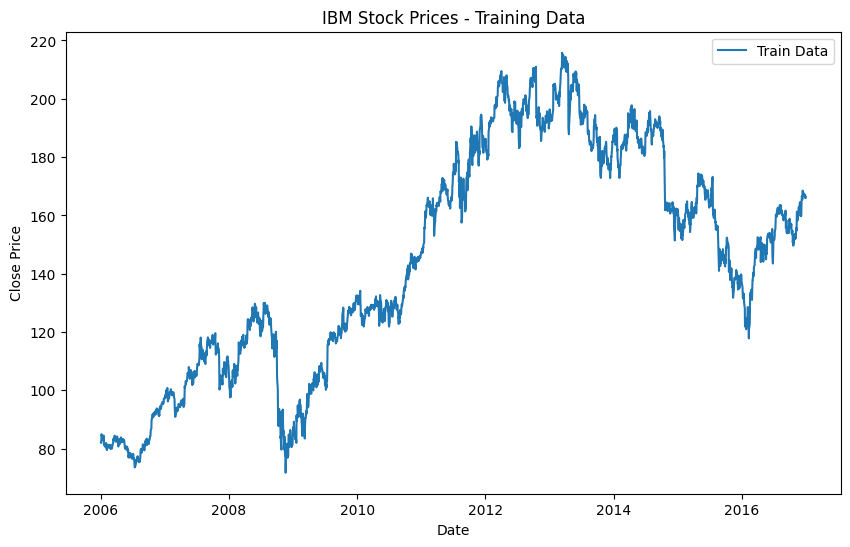

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Prices - Training Data')
plt.legend()
plt.show()

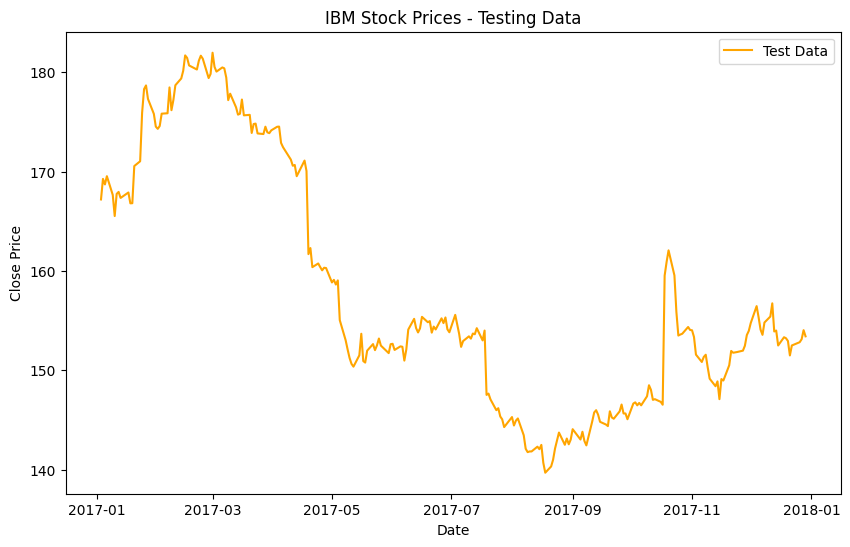

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Test Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Prices - Testing Data')
plt.legend()
plt.show()

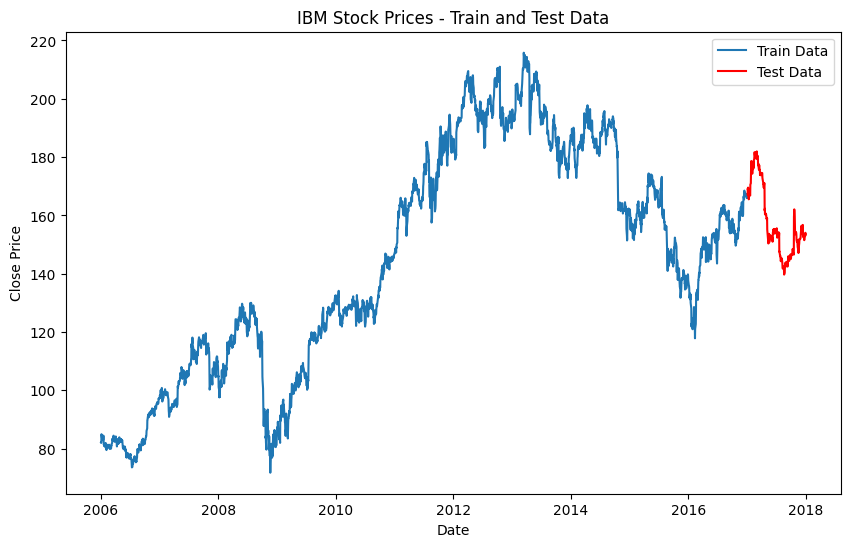

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Prices - Train and Test Data')
plt.legend()
plt.show()

###Analysis

The first plot displays the close prices of the training data over time, with the x-axis representing dates and the y-axis showing close prices. The second plot shows the close prices of the testing data, indicated by an orange line for differentiation, plotted against dates. However, the third plot is a repetition of the second plot, likely included by mistake. These visualizations provide a clear view of how the close prices of IBM stock vary over time in both the training and testing datasets, aiding in trend analysis and understanding the data distribution for further analysis or model development.

##Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

###Analysis

I used the MinMaxScaler from scikit-learn to scale the training data to a specified feature range of 0 to 1. The MinMaxScaler is a preprocessing technique used to normalize data, ensuring that all features are on a similar scale without distorting the original distribution. The fit_transform method fits the scaler to the training data and then transforms it accordingly. This preprocessing step is crucial as it can improve the performance and convergence of models.




##LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.


In [ ]:
X_train = []
y_train = []
timesteps = 60

for i in range(timesteps, len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

###Analysis


Preparing the training data for a time series forecasting or prediction model using a sliding window approach. It initializes empty lists X_train and y_train to store the input features and target variable, respectively. The timesteps is set to 60. During each iteration, it appends a sequence of timesteps previous data points to X_train as input features and the next data point as the corresponding target value to y_train. This approach structures the data into input-output pairs suitable for training a predictive model.

##Reshape the X_train for efficient modeling

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(2709, 60, 1)

###Analysis


Reshaping the training data array X_train. The purpose of this reshaping is to convert the 2-dimensional array X_traininto a 3-dimensional array, specifically adding an extra dimension of size 1 at the end. The shape of X_train before reshaping is determined by X_train.shape, which typically represents the number of samples (rows) and the number of features or time steps (columns) in the data.


#Conclusion

In this activity, I started by loading historical stock price data for IBM from a CSV file. I performed initial data exploration by checking for missing values, dropping unnecessary columns, and splitting the data into training and testing sets based on the date index. Visualizations were created to understand the trends and patterns in the stock prices, both for the training and testing data. Additionally, I reshape the training data array to the required format for deep learning models. Overall, this activity covered various data preprocessing steps, including data loading, cleaning, visualization, and formatting for machine learning tasks. It showcased a structured approach to preparing and analyzing time-series data, setting the stage for further analysis or model development.